# Car Price Prediction

Dataset downloaded from Kaggle 
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv
1.Missing Values
2.Year handling
3.Categorical variables
4. Standardize the values of same scalar

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# To visualize all the columns in the dataframe, change display option
pd.set_option('display.max_columns', None)

In [2]:
# Read Car data
dataset = pd.read_csv('car data.csv')
dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 1. Understanding the Dataset

In [7]:
dataset.shape

(301, 9)

In [4]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Extracting unique values from Categorical features

In [3]:
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
# Printing if any missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
final_dataset = dataset.drop(['Car_Name'],axis=1)
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# creating a new column named 'Age' to know how old the car is
final_dataset['Age']=2021-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [6]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [7]:
# Onehot encoding and prevent dummy variable trap
final_dataset = pd.get_dummies(final_dataset, drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Visualizing Data

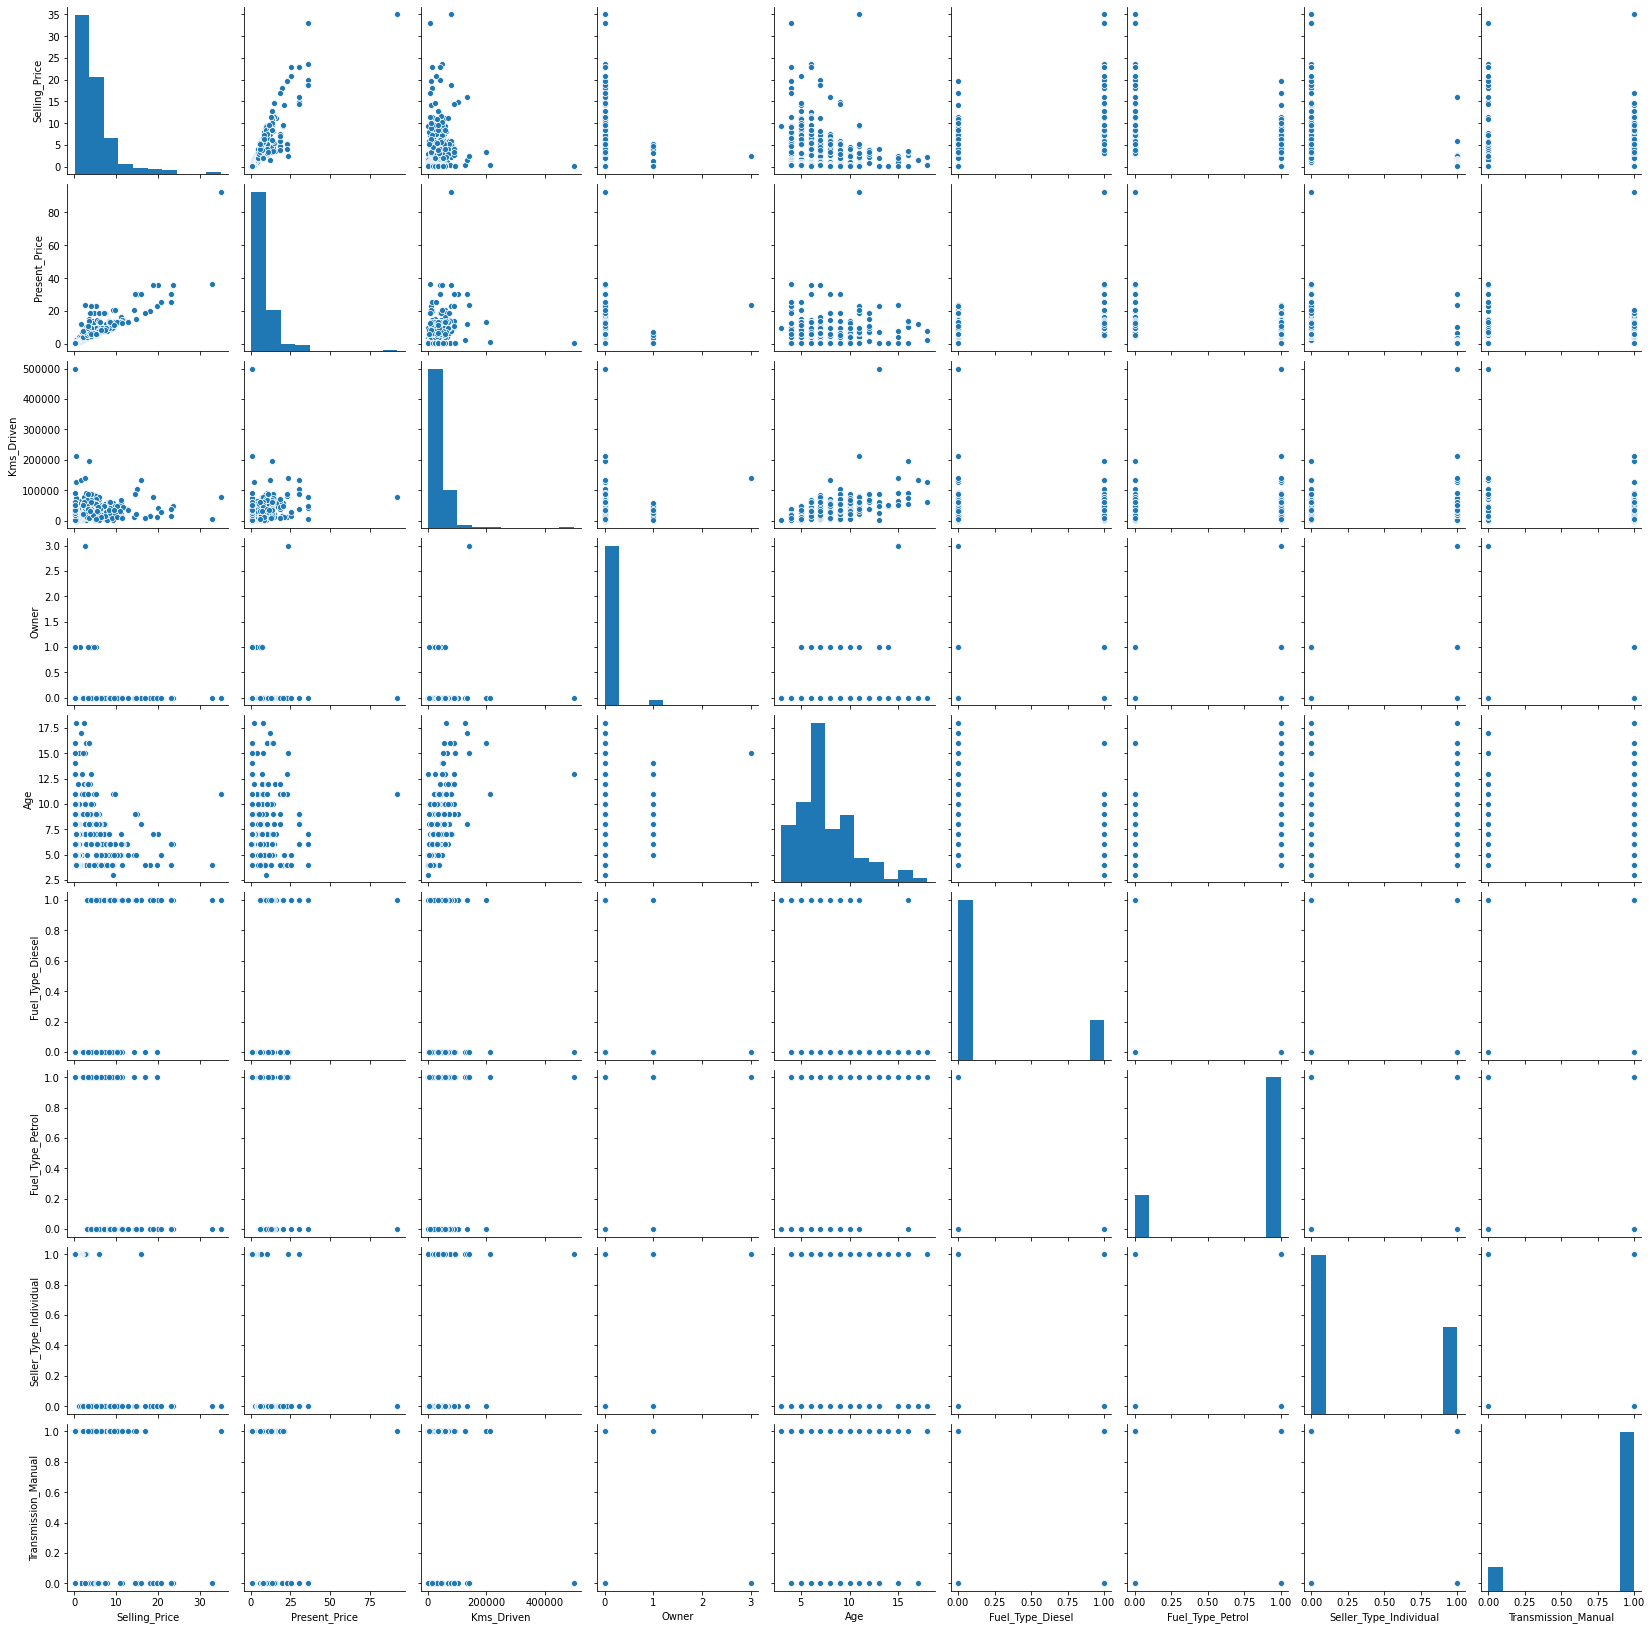

In [15]:
sns.pairplot(final_dataset)

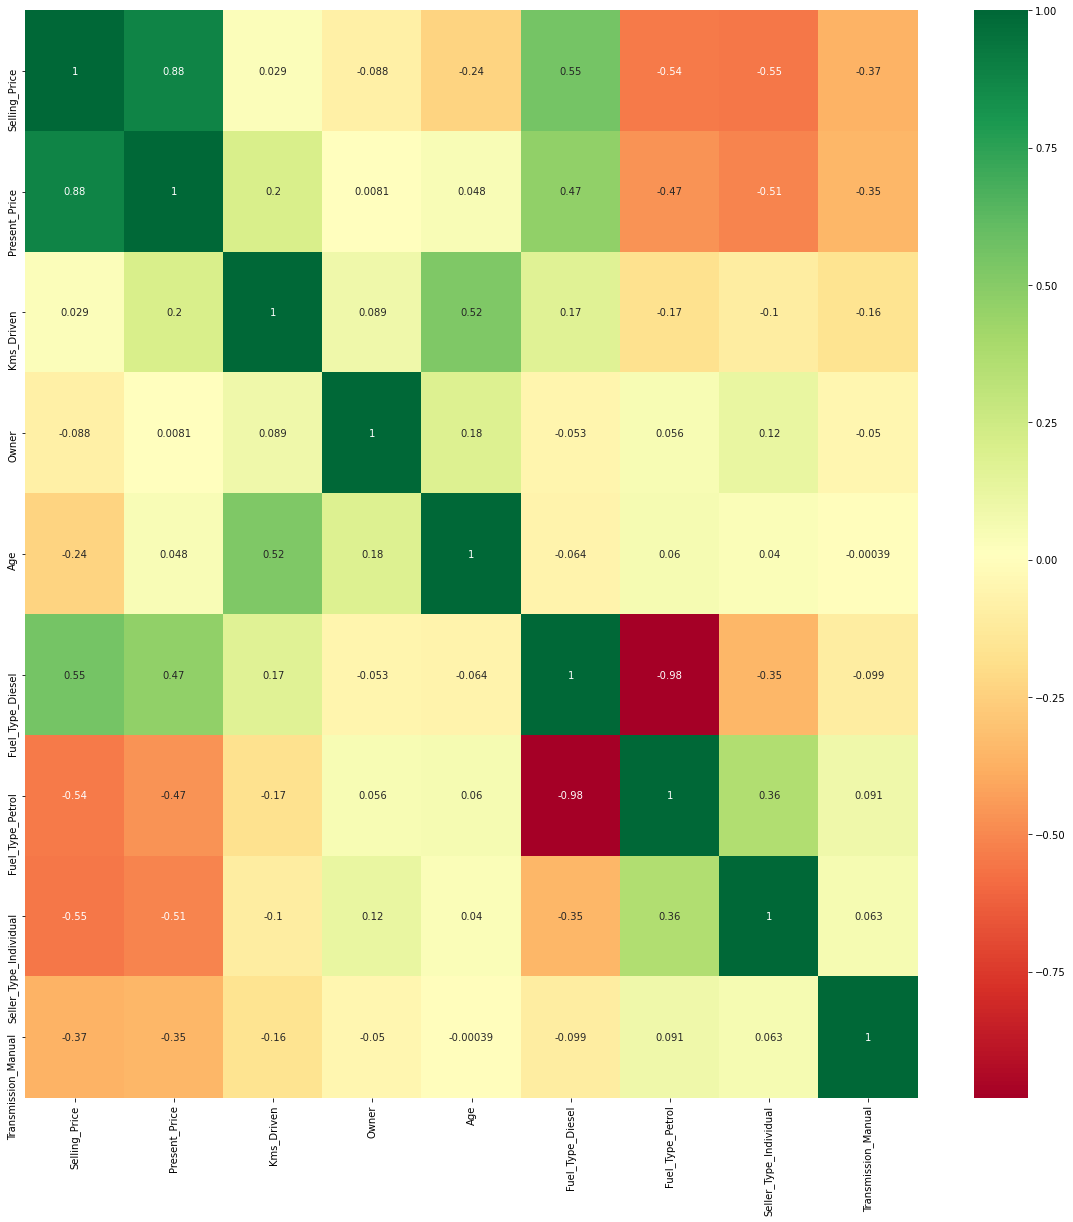

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset.corr(),annot=True,cmap='RdYlGn' )

In [8]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]
print(X.head())
print(y.head())

   Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0           5.59       27000      0    7                 0                 1   
1           9.54       43000      0    8                 1                 0   
2           9.85        6900      0    4                 0                 1   
3           4.15        5200      0   10                 0                 1   
4           6.87       42450      0    7                 1                 0   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


# Model Building

In [ ]:


# Identifying Important Features
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

In [10]:
print(model.feature_importances_)

[4.04865096e-01 3.81877067e-02 3.74987823e-04 8.02424872e-02
 1.99926624e-01 1.13028319e-02 1.32405849e-01 1.32694417e-01]


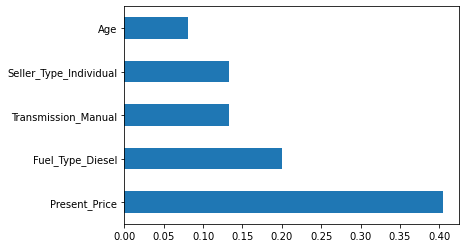

In [11]:
# plot graph of feature importances for better visualization
f_imp = pd.Series(model.feature_importances_, index= X.columns)
f_imp.nlargest(5).plot(kind='barh')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
X_train.shape

(240, 8)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [14]:
### Hyperparameters tuning
n_estimators = list(range(100,1200,100))
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

In [15]:
# randomized Search CV
# number of trees in random forest
n_estimators = list(range(100,1200,100))
# no of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of leves in the trees
max_depth = list(range(5,30,5))
# minimum samples reqd to split a node
min_samples_split = [2,5,10,50,100]
# min samples reqd at each leaf node
min_samples_leaf =[1,2,5,12,25]


In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Create random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10, 50, 100], 'min_samples_leaf': [1, 2, 5, 12, 25]}


In [17]:
# Use random grid to search for best hyperparams 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5,verbose=2,random_state = 20, n_jobs=1)


In [18]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=25, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=25, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=800, min_samples

[CV]  n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=50, min_samples_leaf=12, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 12, 25],
                                        'min_samples_split': [2, 5, 10, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100]},
                   random_state=20, scoring='neg_mean_squared_error',
                   verbose=2)

In [19]:
y_pred = rf_random.predict(X_test)

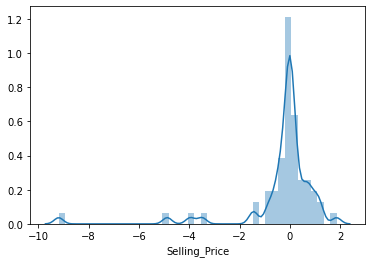

In [20]:
# visualize the difference error in distribution plot and it is distributed around zero
sns.distplot(y_test-y_pred)  


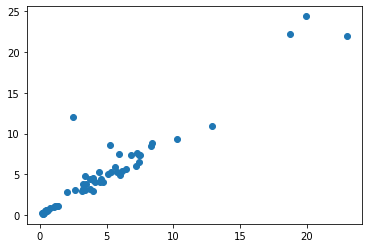

In [42]:
plt.scatter(y_test,y_pred)  

Saving Model

In [21]:
import pickle
# open a file , where to store the model
file = open('random_forest_regression_model.pkl', 'wb')
# dump into file
pickle.dump(rf_random,file)

In [22]:
X_test

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
285,8.500,15059,0,5,0,1,0,0
248,4.600,30000,0,8,0,1,0,1
150,0.826,6000,0,10,0,1,1,1
217,4.430,15000,0,5,0,1,0,1
107,1.500,15000,0,8,0,1,1,1
...,...,...,...,...,...,...,...,...
62,35.960,78000,0,7,1,0,0,0
154,0.880,8000,0,7,0,1,1,1
218,9.400,45078,0,7,0,1,0,1
286,7.900,28569,0,5,0,1,0,1


In [ ]:
new_data=[[]]

In [ ]:
y_new = rf_random.predict(X_test)